K-Nearest Neighbour Algorithm (Classification) using Iris dataset

In [2]:
#import required libraries
import pandas as pd #handles dataframes
import numpy as np #numerical computations on arrays
from collections import Counter #Counter is a specialized dictionary that helps count the frequency of elements in a list or other iterable.
from sklearn.model_selection import train_test_split #divides dataset into: training and testing sets
from sklearn.preprocessing import LabelEncoder #LabelEncoder is used to transform categorical data (like text labels) into numerical representations.

In [5]:
#load dataset
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
#preprocessing dataset
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species']) #converted species column into numerical values
X = df.drop(['Id', 'Species'], axis=1).values #features #.values converted it into NumPy array
y=df['Species'].values #target

In [31]:
#train-test-split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
#Euclidean distance function
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [33]:
#KNN classifier
class KNN:
    def __init__(self,k=3): #constructor of class
        #k=3 : default 3 number of neighboursto consider
        self.k=k

    def fit(self,X,y): #store training data and labels within the object
        self.X_train=X
        self.y_train=y


    def _predict(self, x):
        # Calculate distance from x to all training points
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Get k nearest samples, labels
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Majority vote
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

    def predict(self, X):
        return [self._predict(x) for x in X]

In [36]:
#train and test
knn=KNN(k=3)
knn.fit(X_train,y_train)
predictions=knn.predict(X_test)
accuracy=np.sum(predictions==y_test)/len(y_test)
print("Accuracy: ",accuracy)

Accuracy:  1.0


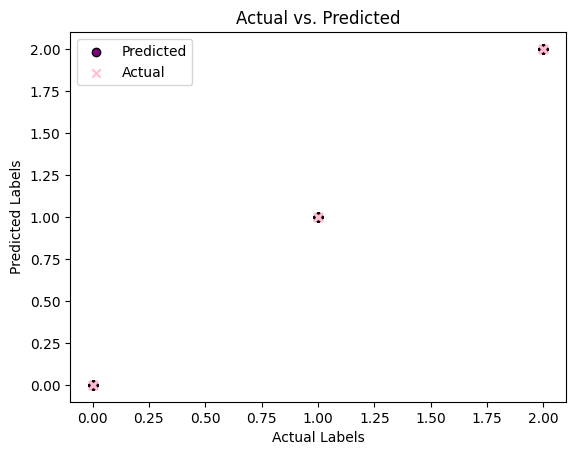

In [39]:
#scatter plot of actual v/s predicted values
import matplotlib.pyplot as plt
plt.scatter(y_test, predictions, c='purple', label='Predicted', marker='o', edgecolors='k')
plt.scatter(y_test, y_test, c='pink', label='Actual', marker='x')

plt.title('Actual vs. Predicted')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.legend()
plt.show()

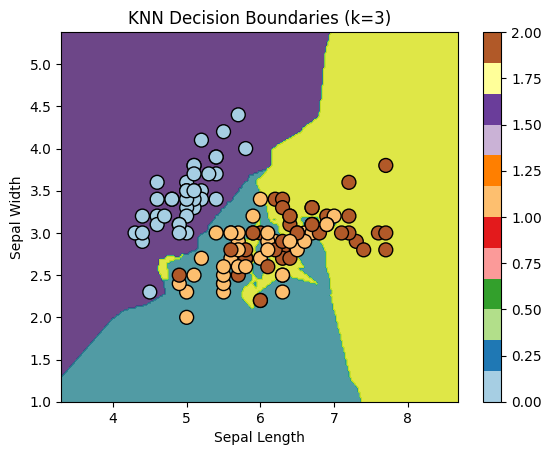

In [42]:
#visualizing decision boundaries
# Use only the first two features for both training and prediction
X_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]

# Initialize and train the KNN classifier on the reduced 2D data
knn = KNN(k=3)
knn.fit(X_2d, y_train)  # Train with only 2 features

# Create a mesh grid to plot decision boundaries
h = .02  # Step size in the mesh
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class for each point in the mesh grid
Z = np.array([knn._predict(np.array([x, y])) for x, y in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_train, edgecolors='k', marker='o', s=100, cmap=plt.cm.Paired)
plt.title(f'KNN Decision Boundaries (k={knn.k})')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.colorbar()
plt.show()

